In [1]:
import os
import numpy as np
import pandas as pd

# Import Data

> ## Only First 3 Rows

In [2]:
# Read excel file with sheet name
dict_df = pd.read_excel('/home/kannika/codes_AI/Rheology_Blood/All_lab_results_Blood_viscosity_work.xlsx', 
                   sheet_name=['Patients_CutSpleen','Patients_NoCutSpleen', 'Normal'], header=2)
dict_df

{'Patients_CutSpleen':     No.  Code       HN     PC  PS activity  Free PS    Hb   Hct    WBC  \
 0     1  HN01  2045512   76.8         43.0     58.6   6.0  19.7  12590   
 1     2  HN02  4045280  100.4         58.8     70.6   7.2  23.6  17840   
 2     3  HN03  3024257   75.6         52.5     57.9   9.0  28.6  12640   
 3     4  HN04  1257101   31.7         57.7     59.3   7.6  23.7  13910   
 4     6  HN06  1797136   43.7         41.1     77.3   8.2  24.8  16180   
 5     7  HN07  2234214   66.4         54.5     62.1   8.2  24.3  10710   
 6    12  HN12  1110168   87.8         39.3     60.0   9.8  30.6  14450   
 7    13  HN13  3949905   50.4         37.0     83.6   5.8  18.0  15240   
 8    16  HN16  1665191   79.0         47.4     59.1  10.6  32.7  13530   
 9    17  HN17  2272494   47.6         34.2     59.6   7.1  21.3  16810   
 10   19  HN19  1513782   55.5         83.0     76.6   8.9  27.9  10050   
 11   23  HN23  2028715   46.7         51.9     62.8   5.0  15.9  12230   
 12

In [3]:
type(dict_df)

dict

In [4]:
dict_sheet =  ['Patients_CutSpleen','Patients_NoCutSpleen', 'Normal']
lstdict_code  = []
for sheet in dict_sheet:
    df_sheet = dict_df[sheet]
    df_sheet["sheet"] = sheet
    dict_code = df_sheet[["Code", "sheet"]]
    lstdict_code.append(dict_code)
    print(dict_df[sheet].shape)

(22, 47)
(22, 47)
(24, 36)


In [63]:
22+22+24

68

In [5]:
print(len(lstdict_code))
df_dictCode = pd.concat(lstdict_code, ignore_index=True)
print(df_dictCode.shape)
df_dictCode

3
(68, 2)


,Code,sheet
0,HN01,Patients_CutSpleen
1,HN02,Patients_CutSpleen
2,HN03,Patients_CutSpleen
3,HN04,Patients_CutSpleen
4,HN06,Patients_CutSpleen
...,...,...
63,NBL19,Normal
64,NBL20,Normal
65,NBL21,Normal
66,NBL22,Normal


In [6]:
print(len(list(df_dictCode["Code"])))
print(len(list(set(df_dictCode["Code"]))))

68
68


# Check DATA

In [7]:
dict_df["Patients_NoCutSpleen"].head(3)

,No.,Code,HN,PC,PS activity,Free PS,Hb,Hct,WBC,Promyelocyte,...,Creatinine,eGFR,Ferritin,TSH,FT4,FT3,Cortisol,ABO,Rh(D),sheet
0,5,HN05,1720866,37.3,37.0,51.5,5.9,18.0,18990,NaN,...,0.42,155.13,702,3.68,0.85,2.97,8.12,O,Pos,Patients_NoCutSpleen
1,8,HN08,2822375,74.2,60.7,67.4,8.4,26.9,10140,NaN,...,0.5,137.82,912,1.58,1.03,2.83,10.4,O,Pos,Patients_NoCutSpleen
2,9,HN09,4122237,80.8,66.9,65.6,8.4,25.9,8240,NaN,...,0.35,158.28,2245,2.3,0.99,3.52,8.17,O,Pos,Patients_NoCutSpleen


In [8]:
dict_df["Patients_CutSpleen"].head(3)

,No.,Code,HN,PC,PS activity,Free PS,Hb,Hct,WBC,Promyelocyte,...,Creatinine,eGFR,Ferritin,TSH,FT4,FT3,Cortisol,ABO,Rh(D),sheet
0,1,HN01,2045512,76.8,43.0,58.6,6.0,19.7,12590,NaN,...,0.38,144.62,537,1.1,0.94,2.98,8.74,A,Pos,Patients_CutSpleen
1,2,HN02,4045280,100.4,58.8,70.6,7.2,23.6,17840,NaN,...,0.47,142.65,342,1.23,0.87,2.61,10.3,A,Pos,Patients_CutSpleen
2,3,HN03,3024257,75.6,52.5,57.9,9.0,28.6,12640,NaN,...,0.53,119.15,440,1.72,1.52,2.72,1.6,O,Pos,Patients_CutSpleen


In [9]:
dict_df["Normal"].head(3)

,No.,Code,PC,PS activity,Free PS,Hb,Hct,WBC,Promyelocyte,Myelocyte,...,NRBC,RDW,Plt. Large cell ratio,PT,INR,PTT,PTT Ratio,ADP,Collagen,sheet
0,1,NBL00,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Normal
1,2,NBL01,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Normal
2,3,NBL02,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,Normal


In [7]:
3*45

135

In [10]:
rootbase = "/home/kannika/codes_AI/Rheology_Blood/BloodCMU"
Row_name, Row_x, Row_y, Row_code = [], [], [], []
Row_pth = os.listdir(rootbase)
print(len(Row_pth))
#Row_pth
for row in Row_pth:
    print(f"[INFO]:Process on code {row}")
    df_Row = pd.read_csv(f"{rootbase}/{row}")
    df_Row["Row_name"] = row
    Code_  = row.split(" ")[-1]
    Code0_ = Code_.split(".")[0]
    df_Row0 = df_Row.head(3)
    df_Row0.columns.values[0] = "x"
    df_Row0.columns.values[1] = "y"
    df_Row0["Row_code"] = Code0_
    Row_name.append(list(df_Row0["Row_name"]))
    Row_x.append(list(df_Row0["x"]))
    Row_y.append(list(df_Row0["y"]))
    Row_code.append(df_Row0["Row_code"])
    #print(df_Row.shape[0])
#row_dict = dict(zip(Row_name, prices))

45
[INFO]:Process on code Row statistics of NBL07.csv
[INFO]:Process on code Row statistics of HN38.csv
[INFO]:Process on code Row statistics of HN07.csv
[INFO]:Process on code Row statistics of HN10.csv
[INFO]:Process on code Row statistics of HN26.csv
[INFO]:Process on code Row statistics of HN20.csv
[INFO]:Process on code Row statistics of NBL13.csv
[INFO]:Process on code Row statistics of HN05.csv
[INFO]:Process on code Row statistics of HN37.csv
[INFO]:Process on code Row statistics of HN41.csv
[INFO]:Process on code Row statistics of HN27.csv
[INFO]:Process on code Row statistics of NBL11.csv
[INFO]:Process on code Row statistics of NBL08.csv
[INFO]:Process on code Row statistics of HN17.csv
[INFO]:Process on code Row statistics of NBL12.csv
[INFO]:Process on code Row statistics of NBL02.csv
[INFO]:Process on code Row statistics of HN09.csv
[INFO]:Process on code Row statistics of HN11.csv
[INFO]:Process on code Row statistics of NBL19.csv
[INFO]:Process on code Row statistics of

/tmp/ipykernel_209045/1709308313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Row0["Row_code"] = Code0_
/tmp/ipykernel_209045/1709308313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Row0["Row_code"] = Code0_
/tmp/ipykernel_209045/1709308313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide

In [11]:
def flatten_list(l):
    flat_list = []
    for sublist in l:
        for item in sublist:
            flat_list.append(item)
    return flat_list

In [12]:
Row_code0 = flatten_list(Row_code)
Row_name0 = flatten_list(Row_name)
Row_x0 = flatten_list(Row_x)
Row_y0 = flatten_list(Row_y)

print(len(Row_name0))
print(len(Row_code0))
print(len(Row_x0))
print(len(Row_y0))

135
135
135
135


In [13]:
DataFrame_Blood = pd.DataFrame(
    {'name': Row_name0,
     'Code': Row_code0,
     'x': Row_x0,
     'y': Row_y0
    })
print(DataFrame_Blood.shape)
DataFrame_Blood

(135, 4)


,name,Code,x,y
0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430
1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548
2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782
3,Row statistics of HN38.csv,HN38,19.917410,0.002190
4,Row statistics of HN38.csv,HN38,7.930730,0.005455
...,...,...,...,...
130,Row statistics of HN30.csv,HN30,7.899895,0.006418
131,Row statistics of HN30.csv,HN30,5.600707,0.008427
132,Row statistics of HN31.csv,HN31,19.755610,0.001217
133,Row statistics of HN31.csv,HN31,7.845877,0.003036


In [14]:
result = pd.merge(DataFrame_Blood, df_dictCode, how="left", on=["Code", "Code"])
print(result.shape)
result

(135, 5)


,name,Code,x,y,sheet
0,Row statistics of NBL07.csv,NBL07,19.828200,0.003430,Normal
1,Row statistics of NBL07.csv,NBL07,7.900978,0.008548,Normal
2,Row statistics of NBL07.csv,NBL07,5.604837,0.011782,Normal
3,Row statistics of HN38.csv,HN38,19.917410,0.002190,Patients_NoCutSpleen
4,Row statistics of HN38.csv,HN38,7.930730,0.005455,Patients_NoCutSpleen
...,...,...,...,...,...
130,Row statistics of HN30.csv,HN30,7.899895,0.006418,Patients_NoCutSpleen
131,Row statistics of HN30.csv,HN30,5.600707,0.008427,Patients_NoCutSpleen
132,Row statistics of HN31.csv,HN31,19.755610,0.001217,Patients_NoCutSpleen
133,Row statistics of HN31.csv,HN31,7.845877,0.003036,Patients_NoCutSpleen


In [15]:
result['sheet'].isnull().values.any()

False

3
[INFO] Sheet : Normal with Shape ==> 51
[INFO] Sheet : Patients_NoCutSpleen with Shape ==> 48
[INFO] Sheet : Patients_CutSpleen with Shape ==> 36


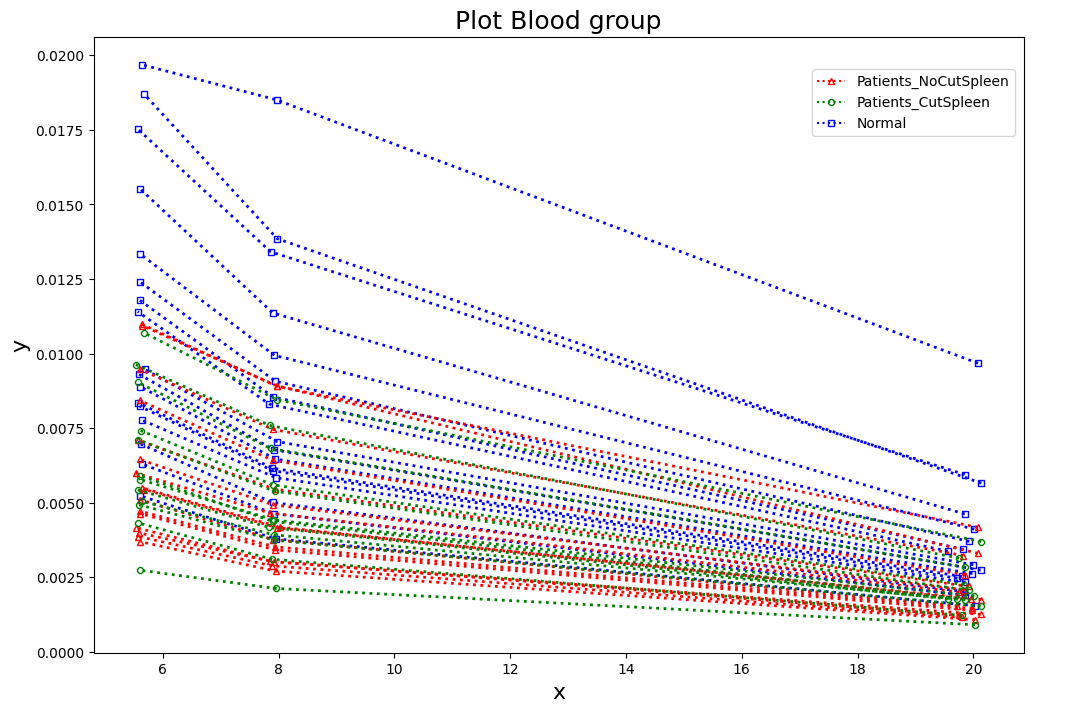

In [16]:
import matplotlib.pyplot as plt


set_sheet = list(set(result['sheet']))
print(len(set_sheet))
set_sheet
#lt.figure(figsize=(12, 8))
fig = plt.figure(figsize=(12, 8))
handles_markers = []
markers_labels = []
colors_labels = []
for s in set_sheet:
    result0 = result[result["sheet"]==s]
    if s == "Patients_NoCutSpleen":
        colors="red"
        markers="^"
    elif s == "Patients_CutSpleen":
        colors="green"
        markers="8"
    elif s == "Normal":
        colors="blue"
        markers="s"
    markers_labels.append(markers)
    colors_labels.append(colors)
    print(f"[INFO] Sheet : {s} with Shape ==> {result0.shape[0]}")
    set_code = list(set(result0["Code"]))
    for sc in set_code:
        df_SetCode = result0[result0["Code"]==sc].reset_index(drop=True)    
        x = df_SetCode["x"].tolist()
        y = df_SetCode["y"].tolist()
    
        #plt.style.use('seaborn')
        plot_handles = plt.plot(x, y, ls=":", marker=markers, markersize=5,lw=2, markerfacecolor="None",color=colors)
        markers_labels.append(s)
        handles_markers.append(handles_markers)
       #plt.plot(x, y, ls=":", marker="8", markersize=4, lw=2, markerfacecolor="None",color=colors)
       #plt.plot(t_x, list_preEff, ls=":", marker="^", markersize=4, lw=2, markerfacecolor="None", label="EffNetB7 Model")
#         plt.plot(t_x, list_meanM, ls=":", marker="s", markersize=4, lw=2, markerfacecolor="None", label="MSDT Algorithm", color="red")

plt.xlabel("x", fontsize=16)
plt.ylabel("y", fontsize=16)
plt.title('Plot Blood group', fontsize=18)

import matplotlib.lines as mlines
red_line = mlines.Line2D([], [], color='red',markersize=5, label='Patients_NoCutSpleen', linestyle=":", marker="^", markerfacecolor="None")
green_line = mlines.Line2D([], [], color='green', markersize=5, label='Patients_CutSpleen', linestyle=":", marker="8", markerfacecolor="None")
blue_line = mlines.Line2D([], [], color='blue', markersize=5, label='Normal', linestyle=":", marker="s", markerfacecolor="None")

handles = [red_line,green_line, blue_line]
labels = [h.get_label() for h in handles] 

fig.legend(handles=handles, labels=labels, borderaxespad=5)

plt.show()